<h1> Projeto da disciplina Tópicos Avançados em SI 6 (Ciência dos Dados)</h1>
<h4> Centro de Informática - Universidade Federal de Pernambuco (CIn - UFPE) </h4>
<h4> Professor: Fernando Neto </h4>
<h4> Equipe: Márcio de Aquino, Vanessa Vieira </h4>
<br>
<h2> Base de dados: <a href=https://archive.ics.uci.edu/ml/datasets/Bank+Marketing> Bank Marketing </a> </h2>

## Hipóteses:
- É possível identificar e classificar um grupo mais provável de aceitar o depósito a prazo
- Há uma relação entre os grupos que aceitam o depósito e a situação sócio-econômica do período
- Há uma relação que engloba o intervalo entre ligações e a resposta
- O tempo de duração da ligação está relacionado com a resposta
- O fato do cliente ter algum empréstimo influencia na resposta


## Pré-processamento

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

from sklearn import preprocessing
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
phone_calls = pd.read_csv('./bank-additional/bank-additional-full.csv')

In [3]:
phone_calls.isnull().sum()
#verificando se tem algum atribudo ausente

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
phone_calls.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<h2> Convertendo atributos categóricos em binários </h2>


In [5]:
#executar SE for necessário converter o atributo de saída para binário
results = {'no': 0, 'yes': 1}
phone_calls.y = [ results[el] for el in phone_calls.y]

In [6]:
#executar SE for necessário converter o atributo de contact para binário
results = {'telephone': 0, 'cellular': 1}
phone_calls.contact = [ results[el] for el in phone_calls.contact]

In [7]:
phone_calls.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


<h2> Discretizando os dados em quantil </h2>

In [8]:
quartiles = pd.cut(phone_calls['emp.var.rate'], 4, labels=range(1,5))
phone_calls = phone_calls.assign(emp_var_rate_cat=quartiles.values)
phone_calls['emp_var_rate_cat'].value_counts()

4    23997
2    10592
3     3693
1     2906
Name: emp_var_rate_cat, dtype: int64

In [9]:
quartiles = pd.cut(phone_calls['cons.price.idx'], 4, labels=range(1,5))
phone_calls = phone_calls.assign(cons_price_idx_cat=quartiles.values)
phone_calls['cons_price_idx_cat'].value_counts()

2    18304
3    15363
4     5320
1     2201
Name: cons_price_idx_cat, dtype: int64

In [10]:
quartiles = pd.cut(phone_calls['cons.conf.idx'], 4, labels=range(1,5))
phone_calls = phone_calls.assign(cons_conf_idx_cat=quartiles.values)
phone_calls['cons_conf_idx_cat'].value_counts()

2    16209
3    14262
1     8876
4     1841
Name: cons_conf_idx_cat, dtype: int64

In [11]:
quartiles = pd.cut(phone_calls['euribor3m'], 4, labels=range(1,5))
phone_calls = phone_calls.assign(euribor3m_cat=quartiles.values)
phone_calls['euribor3m_cat'].value_counts()

4    27676
1    13430
2       68
3       14
Name: euribor3m_cat, dtype: int64

In [12]:
quartiles = pd.cut(phone_calls['nr.employed'], 4, labels=range(1,5))
phone_calls = phone_calls.assign(nr_employed_cat=quartiles.values)
phone_calls['nr_employed_cat'].value_counts()

4    27690
3     8534
1     3301
2     1663
Name: nr_employed_cat, dtype: int64

In [13]:
phone_calls['in_debt'] = (
     phone_calls.apply(lambda x: 1 if (x.housing == 'yes' or x.loan  == 'yes' or x.default == 'yes') else 0 , axis=1)
     )
phone_calls['in_debt'].value_counts()

1    24135
0    17053
Name: in_debt, dtype: int64

In [14]:
criteria = [phone_calls['age'].between(0, 30), phone_calls['age'].between(31, 50), phone_calls['age'].between(50, 200)]
values = [1, 2, 3]

phone_calls['age_cat'] = np.select(criteria, values, 0)
phone_calls['age_cat'].value_counts()

2    26625
1     7383
3     7180
Name: age_cat, dtype: int64

In [15]:
criteria = [phone_calls['duration'].between(0, 20), phone_calls['duration'].between(21, phone_calls['duration'].mean()), phone_calls['duration'].between(phone_calls['duration'].mean(), phone_calls['duration'].max())]
values = [1, 2, 3]

phone_calls['duration_cat'] = np.select(criteria, values, 0)
phone_calls['duration_cat'].value_counts()

2    26438
3    13665
1     1085
Name: duration_cat, dtype: int64

In [16]:
criteria = [phone_calls['campaign'].between(0, phone_calls['campaign'].mean()), phone_calls['campaign'].between(phone_calls['campaign'].mean(), phone_calls['campaign'].max())]
values = [1, 2]

phone_calls['campaign_cat'] = np.select(criteria, values, 0)
phone_calls['campaign_cat'].value_counts()

1    28212
2    12976
Name: campaign_cat, dtype: int64

In [17]:
pdays_without_999 = np.array([x for x in phone_calls['pdays'] if x != 999])

criteria = [phone_calls['pdays'].between(999,999), phone_calls['pdays'].between(0, pdays_without_999.mean()), phone_calls['pdays'].between(pdays_without_999.mean(), pdays_without_999.max())]
values = [1, 2, 3]

phone_calls['pdays_cat'] = np.select(criteria, values, 0)
phone_calls['pdays_cat'].value_counts()

1    39673
2     1117
3      398
Name: pdays_cat, dtype: int64

In [18]:
criteria = [phone_calls['previous'].between(0, phone_calls['previous'].mean()), phone_calls['previous'].between(phone_calls['previous'].mean(), phone_calls['previous'].max())]
values = [1, 2]

phone_calls['previous_cat'] = np.select(criteria, values, 0)
phone_calls['previous_cat'].value_counts()

1    35563
2     5625
Name: previous_cat, dtype: int64

<h2> K-means </h2>

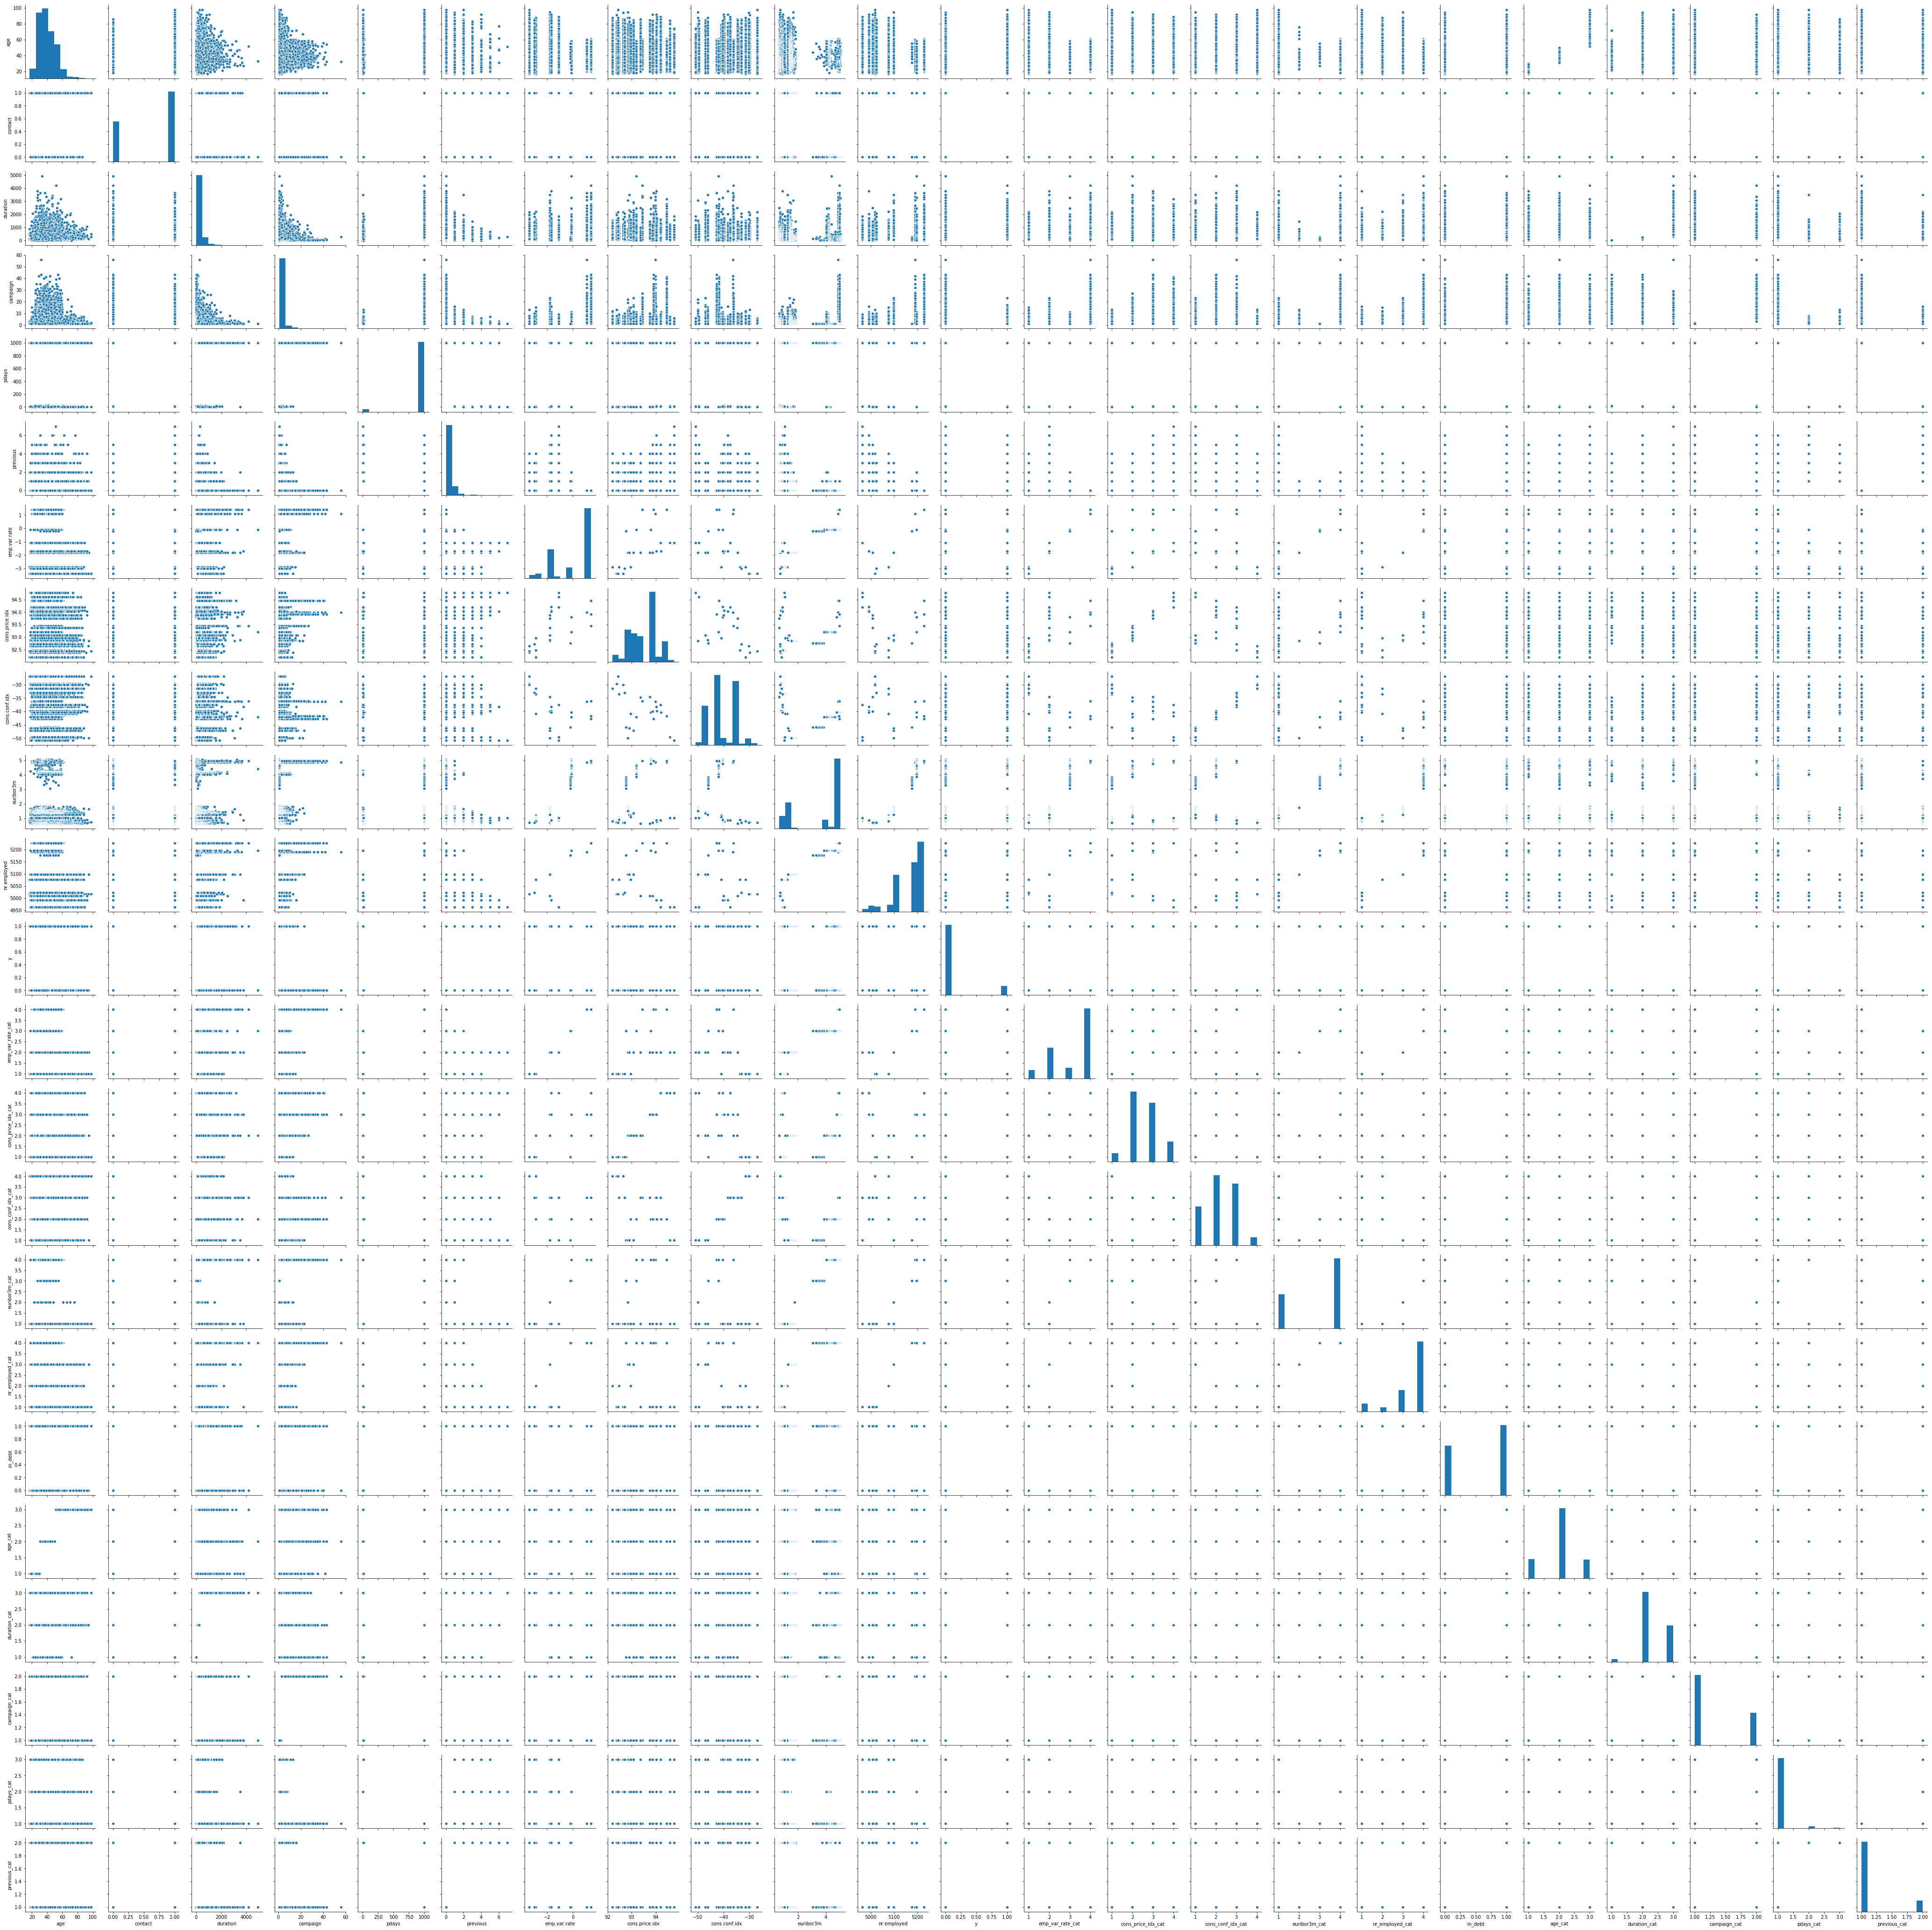

In [19]:
sb.pairplot(phone_calls) #plotando gráfico antes da classificação pelo k-means

In [20]:
ARR =  np.array(phone_calls.drop(['job',                
'marital',            
'education',          
'default',            
'housing',            
'loan',                           
'month',              
'day_of_week',
'poutcome'
],  axis=1)) #preparando array para o k-means, retirando todos os valores não númericos

In [21]:
kmeans = KMeans(n_clusters=4, random_state=0) #definindo a quantidade de clusters que queremos e a aleatoriedade

In [22]:
kmeans.fit(ARR) # treinamendo a base

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [23]:
kmeans.labels_ #conferindo as labels que foram criadas 

array([3, 3, 3, ..., 3, 0, 3])

In [24]:
phone_calls['K-classes'] = kmeans.labels_ #adicionando o resultado do k-means à base

C:\Users\Marcio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Marcio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


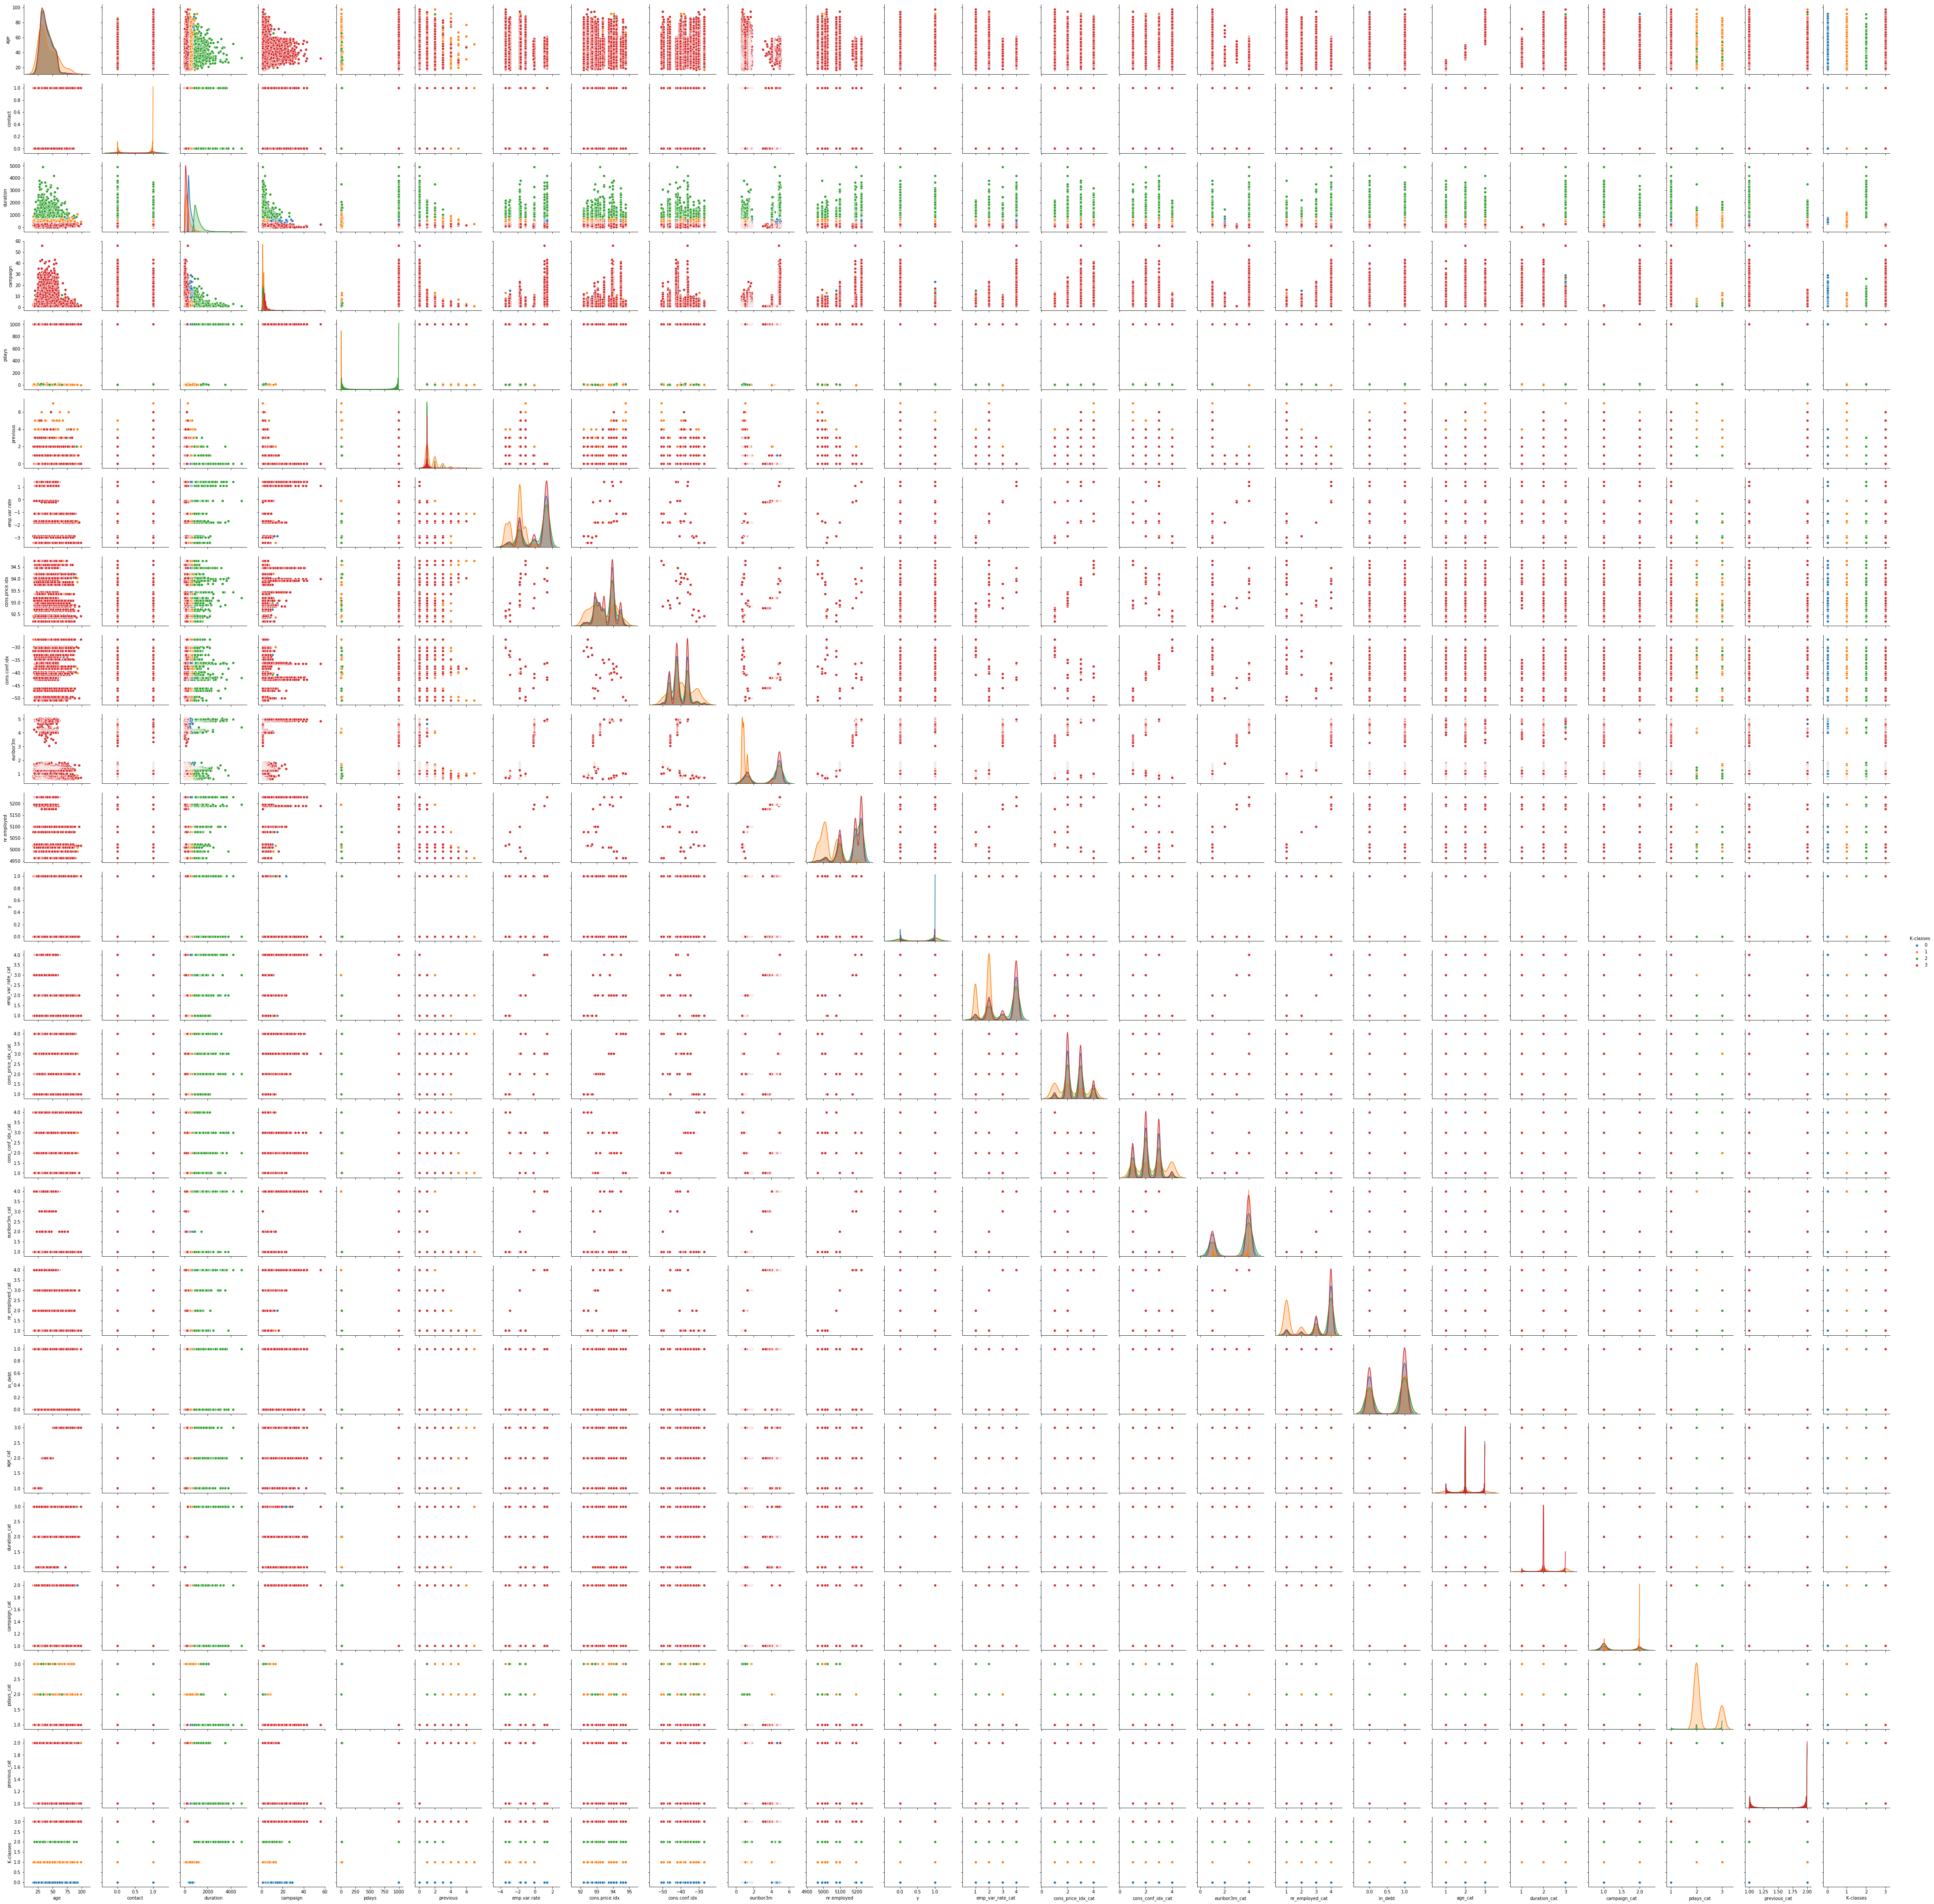

In [25]:
sb.pairplot(phone_calls, hue='K-classes') #plotar gráficos de resultado do K-means